## Figure 3
### QD simulation + theoretical model

In [2]:
# Import Libraries
import Phonon_Number as pn
import parameters as params

import numpy as np
import matplotlib.pyplot as plt
from matplotlib import ticker
from IPython.display import clear_output
from scipy.io import savemat, loadmat

In [10]:
'''
Define and initialize parameters
'''

# Import parameters
omega_m, g, T1, gamma, temperature, nth = params.QD_params()

N = 50                                    # truncation for the phonon number basis in qutip
dephasing = 0                             # dephasing rate in QD; in GHz

data_points = 50                          # number of data points in arrays
pump = g*np.logspace(-1, 1, data_points)  # in GHz
T2 = g*np.logspace(-1, 1, data_points)    # in GHz

# Initializing arrays
theory = np.zeros((len(T2), len(pump)))     # theoretical expression
simulation = np.zeros((len(T2), len(pump))) # for qutip simulation

In [7]:
'''
Iterating over pump and T2 to calculate theoretical and simulation values
'''

for i in range(len(pump)):
    for j in range(len(T2)):
        
        # theory function
        theory[i,j] = pn.QD_theory(g, pump[i], T2[j], T1, gamma, nth)
        
        # simulation function
        simulation[i,j] = pn.QD_simulation(g, pump[i], T2[j], T1, gamma, dephasing, nth, N)
        
        # progress monitor
        if(np.mod(i,10) == 0 and np.mod(j,10) == 0):
            print((i/100,j/100))

clear_output()
print('Calculations done!')

Calculations done!


In [ ]:
'''
Save simulation data
'''

QD_model = {'data_points' : data_points,
            'g' : g,
            'pump' : pump,
            'T2' : T2,
            'T1' : T1,
            'gamma' : gamma,
            'dephasing': dephasing,
            'N' : N,
            'nth' : nth,
            'theory' : theory,
            'simulation' : simulation
            }

savemat("./data files/QD_model.mat", QD_model) # saving data

In [ ]:
'''
Import data
'''
QD_model = loadmat("./data files/QD_model.mat")

g = int(QD_model['g'])
T2 = QD_model['T2'][0]
pump = QD_model['pump'][0]

theory = QD_model['theory']
simulation = QD_model['simulation']

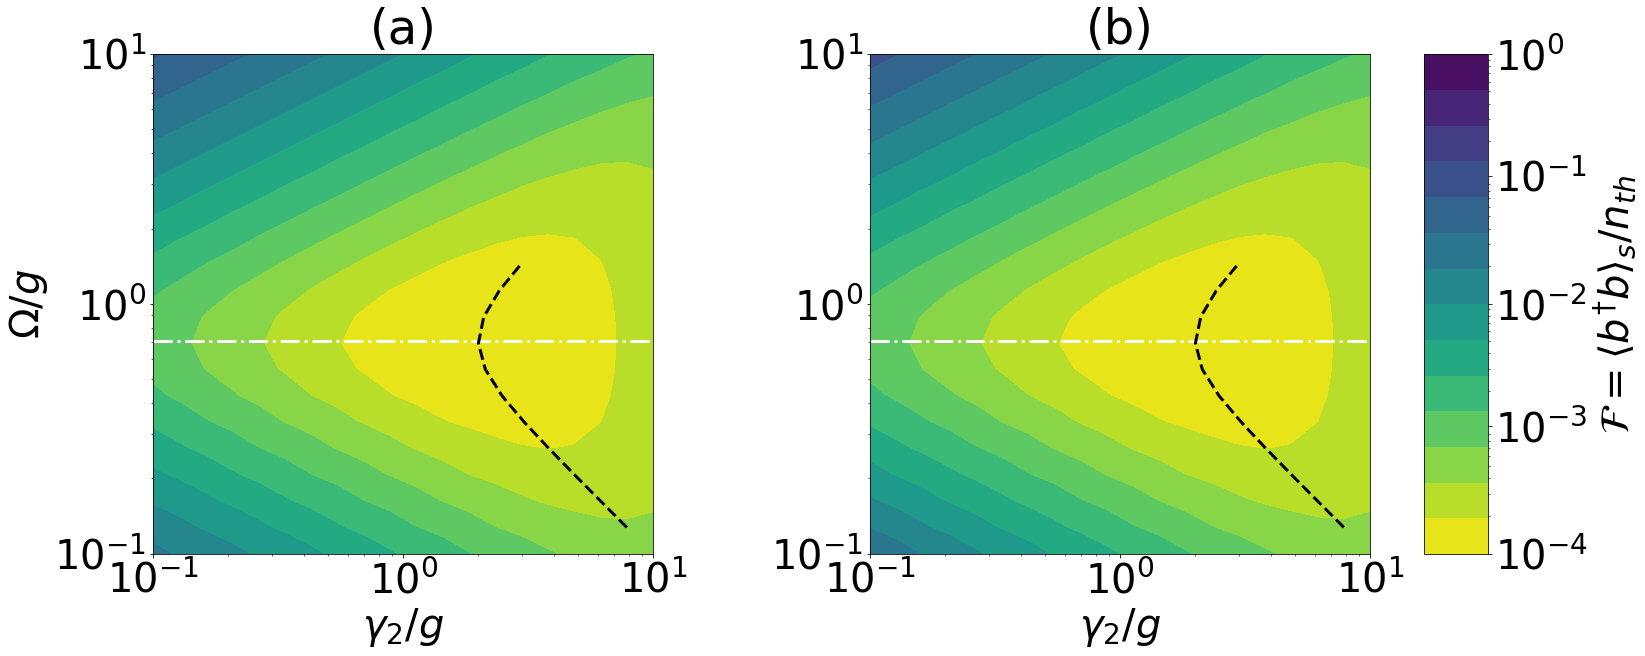

In [9]:
'''
Plotting
'''
# Define plot specifications
fig = plt.figure(constrained_layout=True)
spec = fig.add_gridspec(ncols=2, nrows=1) # subplot grid
[X,Y] = np.meshgrid(T2/g,pump/g) # define X,Y for contour plot
levels = np.logspace(-4,0,15) # finetune gradation in contour plot
locator = ticker.LogLocator(base=10)
size = theory.shape[0]-8

# theory plot
fig.add_subplot(spec[0, 0])
plt.contourf(X,Y, theory, locator=ticker.LogLocator(), levels = levels, cmap = 'viridis_r') # contour plot

# optimal values; see Eq 8 in manuscript
plt.plot(T2/g, pump/(pump*2**(1/2)), color = 'white', linestyle = '-.', linewidth = 3)
plt.plot((4*pump[1:size]**2/g**2 + g**2/(pump[1:size]**2))**0.5, pump[1:size]/g, color = 'black', linestyle = '--', linewidth = 3)

plt.xscale('log')
plt.yscale('log')
plt.xlabel('$\gamma_2/g$')
plt.ylabel('$\Omega/g$')
plt.title('(a)')
plt.yticks([0.1, 1, 10])
ax = plt.gca()
ax.set(adjustable='box', aspect='equal')

# simulation plot
fig.add_subplot(spec[0, 1])
plt.contourf(X,Y, simulation, locator=ticker.LogLocator(), levels = levels, cmap = 'viridis_r') # contour plot

# optimal values; see Eq 8 in manuscript
plt.plot(T2/g, pump/(pump*2**(1/2)), color = 'white', linestyle = '-.', linewidth = 3)
plt.plot((4*pump[1:size]**2/g**2 + g**2/(pump[1:size]**2))**0.5, pump[1:size]/g, color = 'black', linestyle = '--', linewidth = 3)

plt.xscale('log')
plt.yscale('log')
plt.xlabel('$\gamma_2/g$')
plt.title('(b)')
plt.yticks([0.1, 1, 10])
plt.rcParams.update({'font.size': 40})
ax = plt.gca()
ax.set(adjustable='box', aspect='equal')

cbar = plt.colorbar(ticks=locator, aspect = 20, shrink = 1)
cbar.set_label(r'$\mathcal{F} = \langle b^{\dagger}b \rangle_s/n_{th}$')

fig = plt.gcf()
fig.set_size_inches((23, 9))

# fig.savefig('./figures/QD_model.pdf')